In [1]:
import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

2025-05-05 12:10:57.748433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def tvscale(img):
  plt.rcParams['figure.figsize'] = [6,6]
  imgplot = plt.imshow(img, interpolation='none', cmap='gray')
  plt.axis('off')
  plt.show()

In [3]:
try:
  X1 = np.load('./cosmo-late.npy')
except:
  !wget https://github.com/Morisset/Python-lectures-Notebooks/raw/master/Notebooks/cosmo-early.npy
  X1 = np.load('./cosmo-late.npy')
try:
  X2 = np.load('./cosmo-early.npy')
except:
  !wget https://github.com/Morisset/Python-lectures-Notebooks/raw/master/Notebooks/cosmo-late.npy
  X2 = np.load('./cosmo-early.npy')

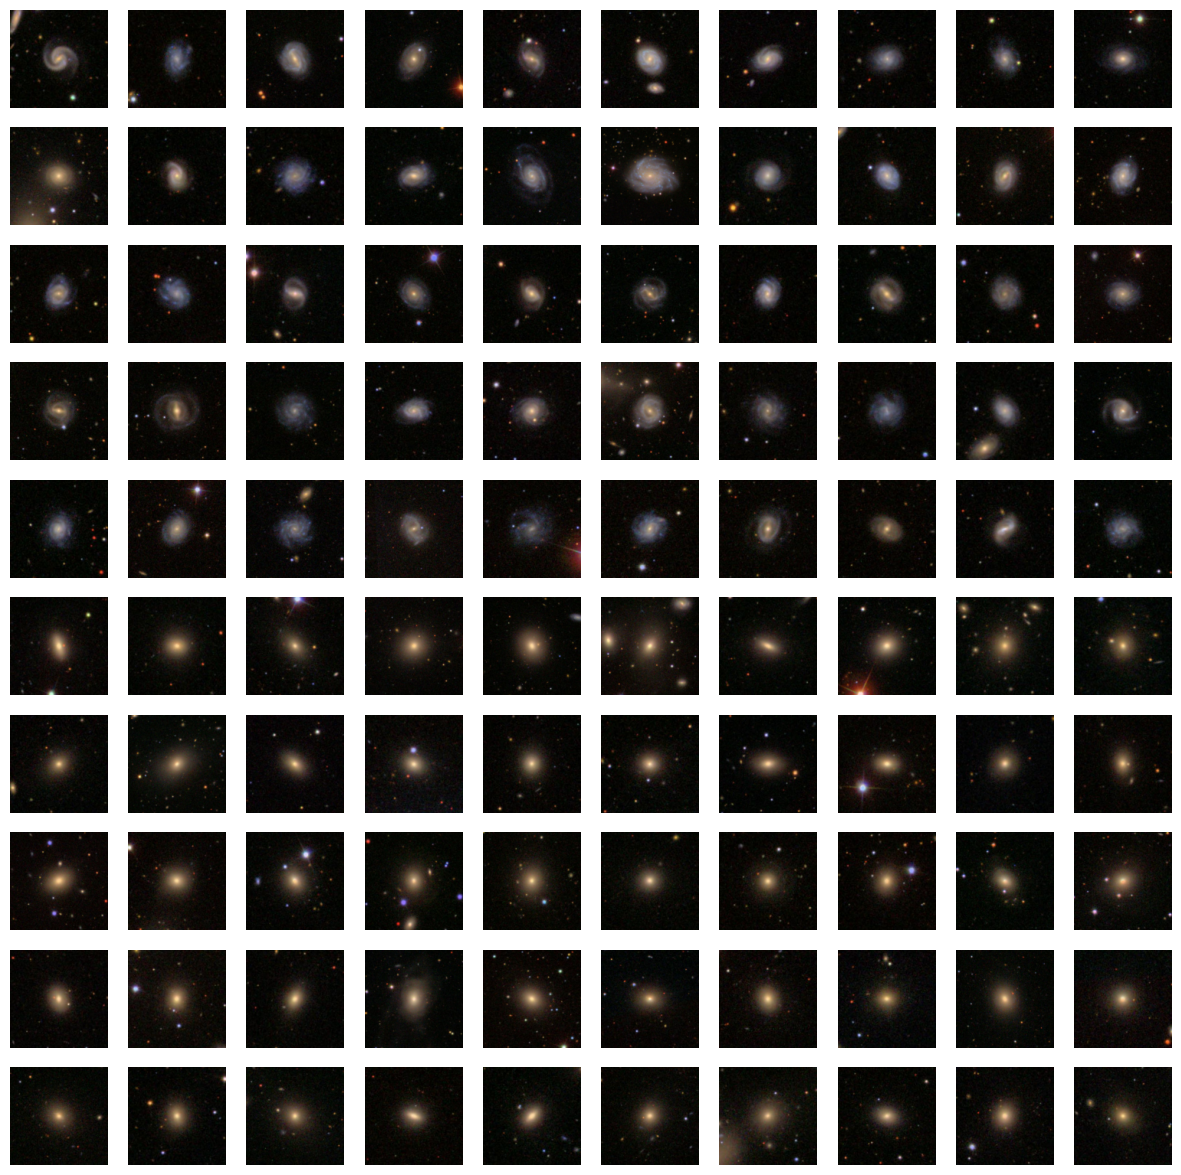

In [16]:
f, axex= plt.subplots(10,10,figsize=(15, 15))
for i, ax in enumerate(axex.flat):
    if i < 50:
        ax.imshow(X1[i,:,:,:])
    else:
        ax.imshow(X2[i-50,:,:,:])
    ax.axis('off')

In [4]:
#tvscale(X1[0])

In [6]:
#-- Definition of the Neural Network
input_img = Input(shape=(128, 128, 3))

activ = 'tanh'

x = Conv2D(filters=16, kernel_size=(3,3), activation=activ, padding='same')(input_img) #-- 128, 128, 3 -> 128, 128, 16
x = MaxPooling2D(pool_size=(2,2), padding='same')(x) #-- 128, 128, 16 -> 64, 64, 16

x = Conv2D(filters=32, kernel_size=(3,3), activation=activ, padding='same')(x) #-- 64, 64, 16 -> 64, 64, 32
x = MaxPooling2D(pool_size=(2,2), padding='same')(x) #-- 64, 64, 32 -> 32, 32, 32

x = Conv2D(filters=64, kernel_size=(3,3), activation=activ, padding='same')(x) #-- 32, 32, 32 -> 32, 32, 64
x = MaxPooling2D(pool_size=(2,2), padding='same')(x) #-- 32, 32, 64 -> 16, 16, 64

x = Conv2D(filters=128, kernel_size=(3,3), activation=activ, padding='same')(x) #-- 
x = MaxPooling2D(pool_size=(2,2), padding='same')(x) #-- 

x = Conv2D(filters=256, kernel_size=(3,3), activation=activ, padding='same')(x) #-- 
x = MaxPooling2D(pool_size=(2,2), padding='same')(x) #-- 

x = Flatten()(x) #-- 16, 16, 64 -> 16,384
x = Dense(32, activation=activ)(x)
x = Dense(16, activation=activ)(x)
x = Dropout(0.3)(x)

out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_img, outputs=out)
model.compile(loss='mse', optimizer='adam', metrics=['mse',])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,257 (2.00 MB)

 Trainable params: 524,257 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#-- Create training sets

X = np.concatenate((X1, X2), axis=0) / 256.
Y = np.zeros(X.shape[0])
Y[0:len(X1)] = 1

rand_ind = np.arange(0, X.shape[0])

np.random.seed(42)
np.random.shuffle(rand_ind)

X = X[rand_ind]
Y = Y[rand_ind]


In [8]:
X_train = X[50:]
Y_train = Y[50:]

X_test = X[0:50]
Y_test = Y[0:50]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(552, 128, 128, 3) (552,) (50, 128, 128, 3) (50,)


In [9]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, shuffle=True)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - loss: 0.2151 - mse: 0.2151
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - loss: 0.0513 - mse: 0.0513
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - loss: 0.0813 - mse: 0.0813
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - loss: 0.0239 - mse: 0.0239
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - loss: 0.0432 - mse: 0.0432
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - loss: 0.0218 - mse: 0.0218
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - loss: 0.0128 - mse: 0.0128
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - loss: 0.0082 - mse: 0.0082
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - loss: 0.0061 - mse: 0.0061
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - loss: 0.0142 - mse: 0.0142
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step - loss: 0.0028 - mse: 0.0028  
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - loss: 0.0120 - mse: 0.0120
Epoch 13/10

In [10]:
Y_pred = np.round(model.predict(X_test))[:,0]

equal = np.where(Y_pred - Y_test == 0)[0]

print(len(equal) / 50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step
0.98


In [24]:
for y1, y2 in zip(Y_pred, Y_test):
    if y1 != y2:
        print(y1, y2)


0.0 1.0
